# Emotional and Contextual Prediction using Bio-signals


# Executive Summary


This case study focuses on a data mining course project, specifically the Big Bremen Data Challenge (BBDC). The task involved predicting the impact of location and various parameters collected by a smartwatch on the user's affect and context.

Our findings suggest that understanding the effects of different areas on human emotions can contribute to creating better environments in the future. In this study, we developed a model that, after evaluating several alternatives, can predict the user's affect and context with an accuracy of 45%. However, the study faced limitations due to the limited amount of data available.

# Introduction <a class="anchor" id="section_1"></a>

This study aims to predict emotions and contextual data using bio-signals. At different job fairs,
smartwatches were used to record the data for different test participants.
Procedure for recording data: The test participants attended various job fairs while wearing a
smartwatch. This used the X, Y, and Z-axis acceleration sensors to record the movement continually.
Additionally, data from photoplethysmography (PPG) were gathered. The heart's rate and "interbeat
intervals" (Ibi) have already been determined from them. The smartwatch questioned the test participants about their emotions and the relevant contextual information at specific times during the trade show visit.

Recorded bio-signals for 53 test participants (person-specific + person-unspecific) are given to
competition participants. All 48 test participants have their emotions and background information
captured for at least two points in time available. For the remaining participants, no context nor feelings are known. There are more recorded bio-signals accessible at later time intervals. There are four classes for context information ("CONVERSATION", "WALKING", "VIEW_BOOTH", and "OTHER") and four classes for emotions ("HAPPY", "RELAXED", "ANGRY", and "SAD"). After analyzing the provided data, the 48 test participants' emotions and contextual information should be anticipated for later times

**Objective**:

● To analyze historical customer data to identify the emotions and context of the user through the
data provided.

● To develop advanced segmentation models to categorize humans based on their emotional and
context information

● To make accurate predictions for all participants' emotional and contextual data.



## Dataset Structure <a class="anchor" id="section_2_1"></a>
Student(1048576 rows, 14 Columns), Skeleton(194Rows,4 columns), Session (59 rows, 6 columns)

Target Variable: affect , context.

**for preprocessing** :  we find the null data and filter the data "sessionId","timestamp", "affect", "context".marge the datasets base on Id and sessionId for better output we get the standard deviation and mean then Transforming the data and get Correlation Matrix.




##  Understanding the Data


In [71]:
# Importing libraries 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

we have this column is student data : 

**sessionId**: The unique identifier for each session or meeting where the data is recorded.

**timestamp**: The time when the data is recorded or the time of the event occurrence.

**x, y, z**: The values from the accelerometer in three spatial coordinate directions, typically used to measure movement and changes in position.

**ppgValue**: The value provided by photoplethysmography (PPG) sensors, usually used to measure changes in blood flow in the body.

**hr**: Heart rate, a measure of heart activity.

**hrIbi**: Interbeat intervals, the time intervals between consecutive heartbeats, which may relate to changes in heart rate.

**hrStatus**: The current status of heart rate, such as whether the heart rate is normal or not.

**ibiStatus**: The current status of interbeat intervals, such as whether the time intervals are normal or not.

**notification**: Any notifications or alerts recorded by the device.

**engagement**: The level of occurrence or active participation in user activities.

**affect**: The user's state or feeling at a specific time.

**context**: Corresponding to the environment or conditions surrounding the user at a specific time, such as conversation, walking, exhibition, etc.


In [72]:
main_path = 'data'
data = pd.read_csv(os.path.join(main_path,'student_data.csv'))
data.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


in the dataset student_data we have to object : affect and context and another columns are int or float so for transfering and normalization we need to mapping them to integer.

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824678 entries, 0 to 8824677
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sessionId     int64  
 1   timestamp     int64  
 2   x             float64
 3   y             float64
 4   z             float64
 5   ppgValue      float64
 6   hr            float64
 7   hrIbi         float64
 8   hrStatus      float64
 9   ibiStatus     float64
 10  notification  float64
 11  engagement    float64
 12  affect        object 
 13  context       object 
dtypes: float64(10), int64(2), object(2)
memory usage: 942.6+ MB


# Data Pre-Processing <a class="anchor" id="section_4"></a>
Preprocessing is an essential phase in the preparation of data for analysis or the training of machine learning models. The specific preprocessing steps needed are determined by the characteristics of the data and the specific requirements of the analysis or model. This process involves various techniques to clean and transform the data, ensuring it is free from errors, inconsistencies, and missing values. By standardizing and normalizing the data, preprocessing also enhances the performance and reliability of the models. Furthermore, it involves encoding categorical variables, scaling numerical features, and splitting the dataset into training and testing sets. These steps collectively contribute to making the data suitable for accurate and efficient modeling, ultimately leading to more robust and generalizable outcomes.



### Checking for missing values <a class="anchor" id="section_4_1"></a>

Count how many affect and context we have in our dataset student_data.The 'affect' column has 240 non-null values and The 'context' column has 233 non-null values.base on it we have a lot of rows are NaN

In [74]:
# 'affect' is the column we want to check for non-null values
column_to_check = 'affect'

# Count the number of non-null values in the specified column
non_null_count = data[column_to_check].count()

print(f"The '{column_to_check}' column has {non_null_count} non-null values.")

The 'affect' column has 240 non-null values.


In [75]:
# 'context' is the column we want to check for non-null values
column_to_check = 'context'

# Count the number of non-null values in the specified column
non_null_count = data[column_to_check].count()

print(f"The '{column_to_check}' column has {non_null_count} non-null values.")

The 'context' column has 233 non-null values.


## Viualization of data

check the data in the affect column and there are 4 type of affect :**Happy, Relaxed, SAD, ANGRY**, . Happy = 114 and Relaxed = 112 is more than the other types.

In [76]:
print('affect count:\n',data.affect.value_counts())

affect count:
 affect
HAPPY      114
RELAXED    112
SAD          9
ANGRY        5
Name: count, dtype: int64


The plot of data in affect is the following plot : 
in this plot we can see the diffrent between the type of relax and happy is more than angry and sad ( positive affect is better negative affect)

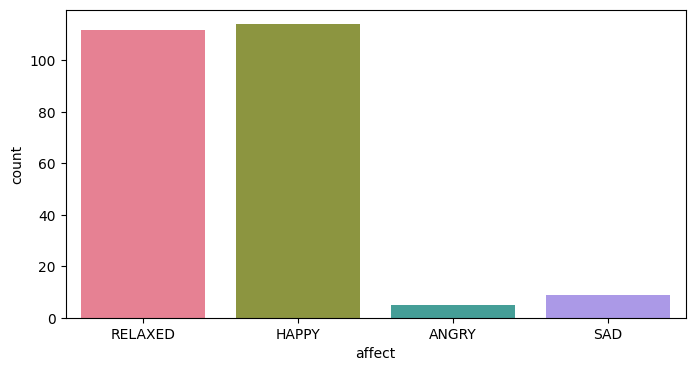

In [77]:
plt.figure(figsize=(8,4));
sns.countplot(x='affect', data=data, palette='husl');

The difference between types of context is less than the types of affect, and maybe it can help us to have better results.

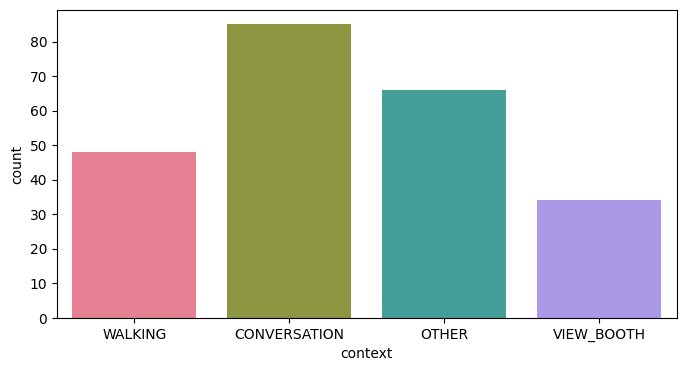

In [78]:
plt.figure(figsize=(8,4));
sns.countplot(x='context', data=data, palette='husl');

check the data in the context column and there are 4 type of context :CONVERSATION, OTHER , VIEW_BOOTH. CONVERSATION is more than the other types.

In [79]:
print('context count:\n',data.context.value_counts())

context count:
 context
CONVERSATION    85
OTHER           66
WALKING         48
VIEW_BOOTH      34
Name: count, dtype: int64


### Over Time
we check the data over time. Over time by column in the timestamp is recognized, and we check the other columns such as affect, heart rate, Context, and so on based on this column. To find what happens when the people are visiting the exhibition.
**Timestamp**: The time when the data is recorded or the time of the event occurrence.

### Geografical Movement Position

the plot shows the geographical movement position in a three-dimensional space, where the x, y, and z coordinates are plotted against each other. Each point in the plot represents a data point from the dataset, with the color indicating the timestamp

When the data points are more clustered in a corner, it means that most of the data points are concentrated in a corner area or close to each other, indicating a lower spread. This could imply the presence of a distinct pattern or behavior in the data, aiding in identifying relationships and interactions among the data points.

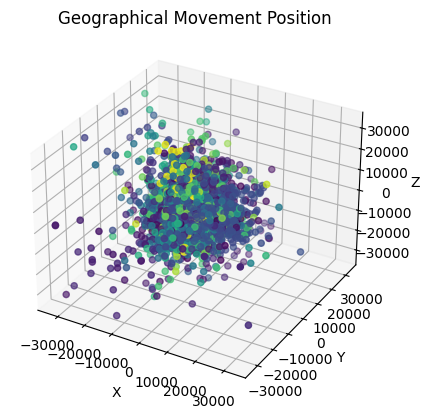

In [80]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'], c=data['timestamp'], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Geographical Movement Position')
plt.show()


#### Heart rate 
during the time heart rate between 40 to 120 and the norm of pepole are in 80 

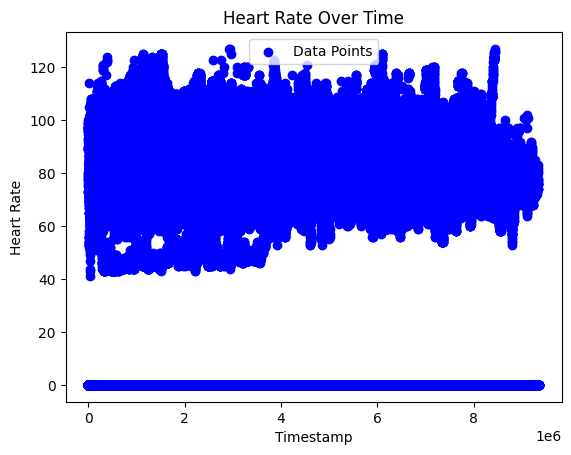

In [81]:


# Plot a scatter plot of heart rate over time
plt.scatter(data['timestamp'], data['hr'], marker='o', color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time')
plt.legend()
plt.show()


### affect over Time
Over time, we see all types of affects but as I said the types of sad and angry were little in the data set so we have little data for that, and we can not decide what happened and which affect is eliminated during the time. 

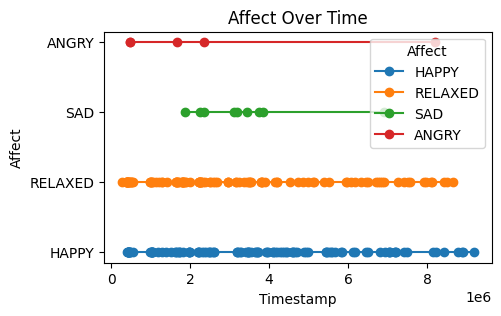

In [82]:
# Drop rows with missing values in 'timestamp' and 'affect'
dataplt = data.dropna(subset=['timestamp', 'affect'])

# Create a mapping of affect labels to numerical values
affect_mapping = {'HAPPY': 1, 'RELAXED': 2, 'SAD': 3, 'ANGRY': 4}

# Map the affect column to numerical values
dataplt['affect_num'] = dataplt['affect'].map(affect_mapping)

# Sort dataplt by timestamp
dataplt = dataplt.sort_values(by='timestamp')

# Plot a line plot of affect over time
plt.figure(figsize=(5, 3))
for affect, affect_num in affect_mapping.items():
    subset = dataplt[dataplt['affect_num'] == affect_num]
    plt.plot(subset['timestamp'], subset['affect_num'], marker='o', linestyle='-', label=affect)

# Set y-ticks to display the affect labels instead of numerical values
plt.yticks(list(affect_mapping.values()), list(affect_mapping.keys()))

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Affect')
plt.title('Affect Over Time')
plt.legend(title='Affect')
plt.show()


In [83]:
print(dataplt[['timestamp', 'affect']])

         timestamp   affect
311409      270489  RELAXED
417230      374515  RELAXED
4427231     382489  RELAXED
900699      388545  RELAXED
2586147     394108  RELAXED
...            ...      ...
3161593    8661038  RELAXED
6487463    8775275    HAPPY
4647213    8885754    HAPPY
6935671    8911774    HAPPY
2572941    9192942    HAPPY

[240 rows x 2 columns]


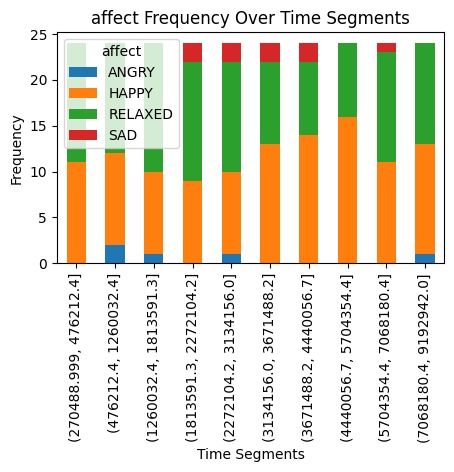

In [84]:


# Define the number of segments
num_segments = 10

# Create bins for the timestamp segments
dataplt['time_segment'] = pd.qcut(dataplt['timestamp'], num_segments)

# Calculate the frequency of each affect within each time segment
context_segment_counts = dataplt.groupby(['time_segment', 'affect']).size().unstack(fill_value=0)

# Plot the affect frequencies over time segments
context_segment_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.xlabel('Time Segments')
plt.ylabel('Frequency')
plt.title('affect Frequency Over Time Segments')
plt.legend(title='affect')
plt.show()


### context over Time

As you can see, Conversation in over the time more than the other categories.

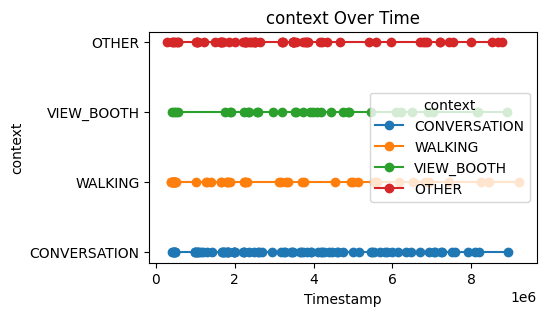

In [85]:

# Drop rows with missing values in 'timestamp' and 'context'
dataplt = data.dropna(subset=['timestamp', 'context'])

# Create a mapping of affect labels to numerical values
context_mapping = {'CONVERSATION': 1, 'WALKING': 2, 'VIEW_BOOTH': 3, 'OTHER': 4}

# Map the context column to numerical values
dataplt['context_num'] = dataplt['context'].map(context_mapping)

# Sort dataplt by timestamp
dataplt = dataplt.sort_values(by='timestamp')

# Plot a line plot of context over time
plt.figure(figsize=(5, 3))
for context, context_num in context_mapping.items():
    subset = dataplt[dataplt['context_num'] == context_num]
    plt.plot(subset['timestamp'], subset['context_num'], marker='o', linestyle='-', label=context)

# Set y-ticks to display the context labels instead of numerical values
plt.yticks(list(context_mapping.values()), list(context_mapping.keys()))

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('context')
plt.title('context Over Time')
plt.legend(title='context')
plt.show()

In [86]:
print(dataplt[['timestamp', 'context']])

         timestamp       context
311626      278819         OTHER
417343      378819       WALKING
4427522     393686       WALKING
901104      404077       WALKING
667687      409699    VIEW_BOOTH
...            ...           ...
3161959    8675123         OTHER
6487639    8782066         OTHER
4647397    8892807    VIEW_BOOTH
6935820    8917474  CONVERSATION
2573442    9212255       WALKING

[233 rows x 2 columns]


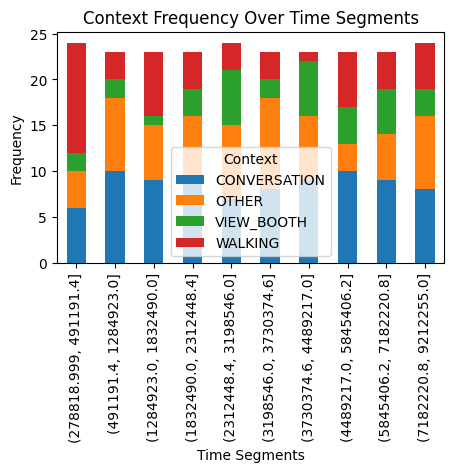

In [87]:


# Define the number of segments
num_segments = 10

# Create bins for the timestamp segments
dataplt['time_segment'] = pd.qcut(dataplt['timestamp'], num_segments)

# Calculate the frequency of each context within each time segment
context_segment_counts = dataplt.groupby(['time_segment', 'context']).size().unstack(fill_value=0)

# Plot the context frequencies over time segments
context_segment_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.xlabel('Time Segments')
plt.ylabel('Frequency')
plt.title('Context Frequency Over Time Segments')
plt.legend(title='Context')
plt.show()


In [88]:
# 'affect' and 'context' are the columns of interest
columns_of_interest = ['affect','context']

# Filter the DataFrame to include only rows where either 'context' or 'affect' is not null
data_affect = data[data[columns_of_interest].notnull().any(axis=1)]
print(f"The '{columns_of_interest}' column has {data_affect.count()} non-null values.")



The '['affect', 'context']' column has sessionId       473
timestamp       473
x                 0
y                 0
z                 0
ppgValue          0
hr                0
hrIbi             0
hrStatus          0
ibiStatus         0
notification      0
engagement        0
affect          240
context         233
dtype: int64 non-null values.


In [89]:
# Display the filtered DataFrame
data_affect.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
13023,1,503234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELAXED,NaN
13173,1,509006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WALKING
69440,1,2689934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELAXED,NaN
69715,1,2700529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONVERSATION
97876,1,3788764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELAXED,NaN


we only keep the sessionID and timestamp , effect and context and there is in new data fram 'data_affect_filtered'. because we want to get the data fram before change or creat new column.

In [90]:
data_affect_filtered= data_affect[["sessionId","timestamp","affect",'context']]
data_affect_filtered.head()

,sessionId,timestamp,affect,context
13023,1,503234,RELAXED,NaN
13173,1,509006,NaN,WALKING
69440,1,2689934,RELAXED,NaN
69715,1,2700529,NaN,CONVERSATION
97876,1,3788764,RELAXED,NaN


in the Box plot category of others we have outliers so we can remove them for clear data and in the column affect we have outliers for sad category and we remove the data. 

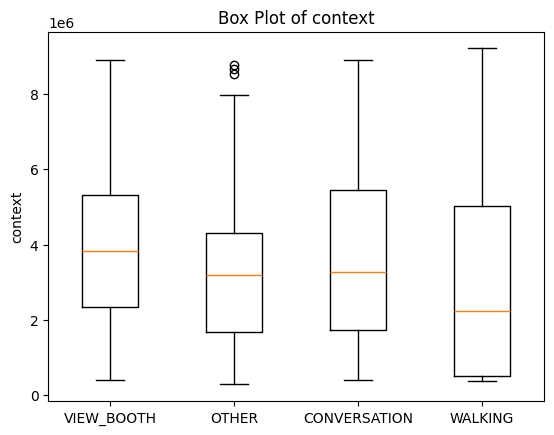

In [91]:
# Boxplots
plt.figsize = (9,4)


L_WALKING = data_affect_filtered[data_affect_filtered['context'] == 'WALKING']['timestamp']
L_CONVERSATION = data_affect_filtered[data_affect_filtered['context'] == 'CONVERSATION']['timestamp']
L_OTHER = data_affect_filtered[data_affect_filtered['context'] == 'OTHER']['timestamp']
L_VIEW_BOOTH = data_affect_filtered[data_affect_filtered['context'] == 'VIEW_BOOTH']['timestamp']

plt.boxplot([L_VIEW_BOOTH, L_OTHER,L_CONVERSATION,L_WALKING], labels=['VIEW_BOOTH', 'OTHER','CONVERSATION','WALKING'])
plt.ylabel('context')
plt.title('Box Plot of context')
plt.show()


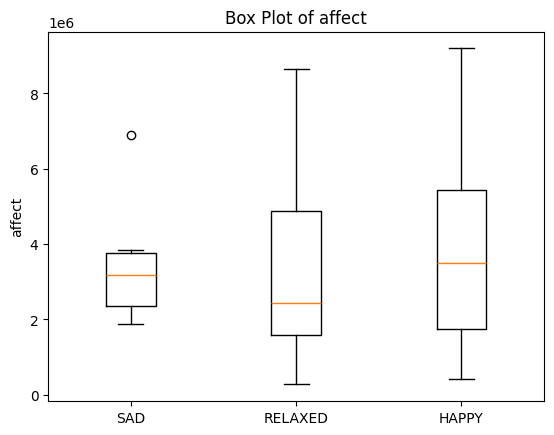

In [92]:
# Boxplots
plt.figsize = (9,4)


L_HAPPY = data_affect_filtered[data_affect_filtered['affect'] == 'HAPPY']['timestamp']
L_RELAXED = data_affect_filtered[data_affect_filtered['affect'] == 'RELAXED']['timestamp']
L_SAD = data_affect_filtered[data_affect_filtered['affect'] == 'SAD']['timestamp']
#L_ANGRY = data_affect_filtered[data_affect_filtered['affect'] == 'VIEW_ANGRY']['timestamp']

plt.boxplot([ L_SAD,L_RELAXED,L_HAPPY], labels=[ 'SAD','RELAXED','HAPPY'])
plt.ylabel('affect')
plt.title('Box Plot of affect')
plt.show()


In [93]:
data_affect_filtered

,sessionId,timestamp,affect,context
13023,1,503234,RELAXED,NaN
13173,1,509006,NaN,WALKING
69440,1,2689934,RELAXED,NaN
69715,1,2700529,NaN,CONVERSATION
97876,1,3788764,RELAXED,NaN
...,...,...,...,...
8008986,58,2595091,HAPPY,NaN
8009183,58,2602657,NaN,CONVERSATION
8061087,58,4610020,HAPPY,NaN
8101818,58,6185055,HAPPY,NaN


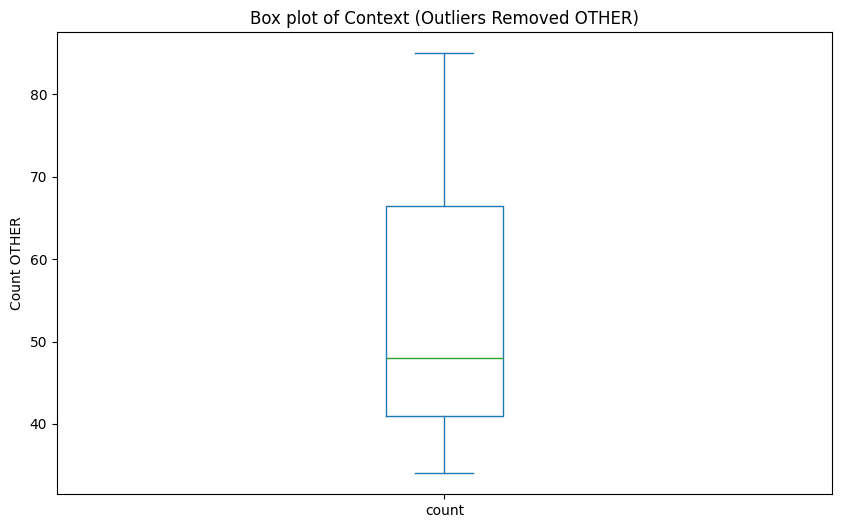

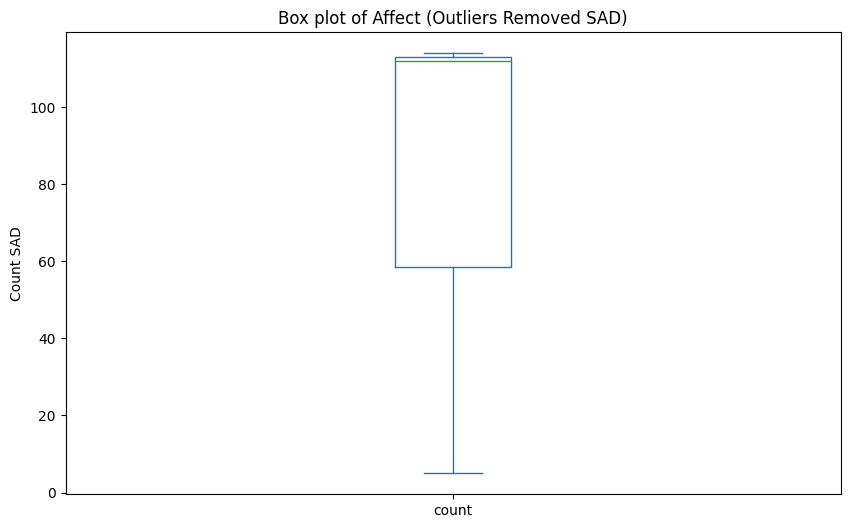

In [94]:

# Check if 'context' and 'affect' columns exist
if 'context' in data_affect_filtered.columns and 'affect' in data_affect_filtered.columns:
    # Identify and remove outliers in the 'context' category 'OTHER'
    context_counts = data_affect_filtered['context'].value_counts()
    context_other = context_counts[context_counts.index == 'OTHER'].index
    data_cleaned = data_affect_filtered[~data_affect_filtered['context'].isin(context_other)]

    # Identify and remove outliers in the 'affect' category 'SAD'
    affect_counts = data_affect_filtered['affect'].value_counts()
    affect_sad = affect_counts[affect_counts.index == 'SAD'].index
    data_cleaned = data_cleaned[~data_cleaned['affect'].isin(affect_sad)]

    # Plot the cleaned data
    plt.figure(figsize=(10, 6))
    data_cleaned['context'].value_counts().plot(kind='box')
    plt.title('Box plot of Context (Outliers Removed OTHER)')
    plt.ylabel('Count OTHER')
    plt.show()

    plt.figure(figsize=(10, 6))
    data_cleaned['affect'].value_counts().plot(kind='box')
    plt.title('Box plot of Affect (Outliers Removed SAD)')
    plt.ylabel('Count SAD')
    plt.show()
else:
    print("The 'context' or 'affect' column does not exist in the DataFrame.")


### Session Data All

we read the other data set : SessionData-all. 
there are columns : 
id:  identifier for each session or individual in the dataset.

duration:  duration of each session, perhaps measured in units such as minutes or seconds.

watchId: identifier associated with the watch used during the session, such as a device ID or serial number.

age:  age of the individual participating in the session.

gender:  the gender of the individual participating in the session, typically categorized as male, female.

fairNumber: the number of times the fair has been attended by an individual or some sort of identifier for a particular fair.

we read the data from CSV file

In [113]:
data2= pd.read_csv('data\SessionData-all.csv')
data2.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1


#### Age

we have three category for age there ate 18-25 and 26-30 and 31-40 and the 18-25 is more than the other categories.

In [114]:
print('Age ount:\n',data2.age.value_counts()) 

Age ount:
 age
18-25    41
26-30    11
31-40     6
Name: count, dtype: int64


#### Gender

base on the count we are the same in both gender 

In [115]:
print('Gender ount:\n',data2.gender.value_counts()) 

Gender ount:
 gender
female    30
male      28
Name: count, dtype: int64


in both gender in age 18-25 are more the other ages.

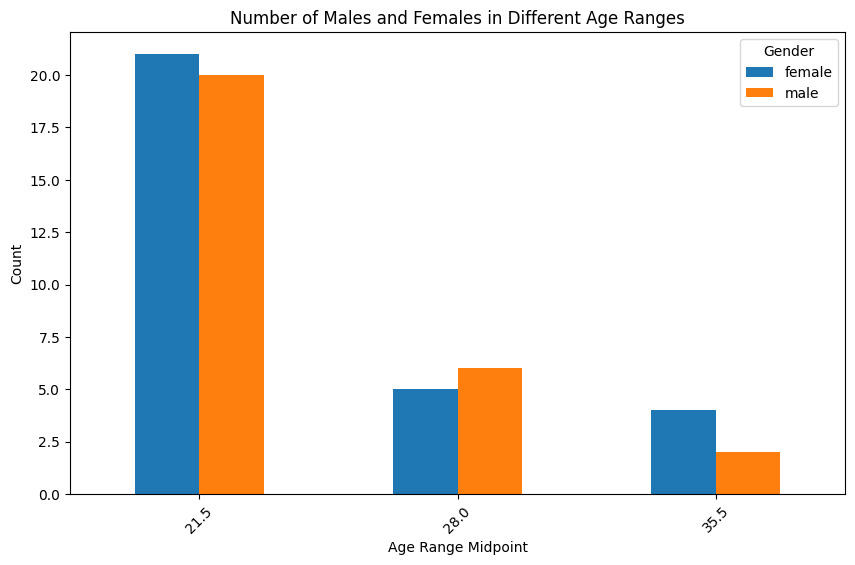

In [116]:

# Preprocess the 'Age' column to calculate the midpoint of each age range
data2['age'] = data2['age'].apply(lambda x: (sum(map(int, x.split('-'))) / 2) if isinstance(x, str) else x)

# Aggregate the values to remove duplicate entries
dataplt2 = data2.groupby(['age', 'gender']).size().reset_index(name='count')

# Pivot the data to the desired shape for plotting
pivot_df = dataplt2.pivot(index='age', columns='gender', values='count')

# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of Males and Females in Different Age Ranges')
plt.xlabel('Age Range Midpoint')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


The largest age group in the dataset consists of individuals approximately 21 years old, and there is an equal number of males and females in both age groups.

we merge the data sets base on sessionId  in student data set and Id in sessiondata-all dataset.

In [124]:
merged_table = pd.merge(data,data2,left_on = 'sessionId',right_on = 'id')

In [125]:
merged_table.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,id,duration,watchId,age,gender,fairNumber
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1


In [123]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824678 entries, 0 to 8824677
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sessionId     int64  
 1   timestamp     int64  
 2   x             float64
 3   y             float64
 4   z             float64
 5   ppgValue      float64
 6   hr            float64
 7   hrIbi         float64
 8   hrStatus      float64
 9   ibiStatus     float64
 10  notification  float64
 11  engagement    float64
 12  affect        object 
 13  context       object 
 14  id            int64  
 15  duration      int64  
 16  watchId       object 
 17  age           float64
 18  gender        object 
 19  fairNumber    int64  
dtypes: float64(11), int64(5), object(4)
memory usage: 1.3+ GB


### Skeleton Dataset 

In [18]:
#merged_data = merged_table.drop(columns=['id','duration','fairNumber'])
#merged_data.head()

the last dataset is Student_skeleton and there are columns : 

we have this column is student data : 

**sessionId**: The unique identifier for each session or meeting where the data is recorded.

**timestamp**: The time when the data is recorded or the time of the event occurrence.

**affect**: The user's state or feeling at a specific time.

**context**: Corresponding to the environment or conditions surrounding the user at a specific time, such as conversation, walking, exhibition, etc.



In [126]:
data3= pd.read_csv('data\student_skeleton.csv')

data3.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


### Correlation 

now in this step we want to find the correlation between the data in ech column and check the feature we can use it . 

To delete the corrupt data 'hrStatus' == 1 and'ibiStatus' == 0 for having the correct data


In [127]:
data_filtered = data[(data['hrStatus'] == 1) & (data['ibiStatus'] == 0)]

data_filtered.head()


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
16,1,611,NaN,NaN,NaN,NaN,90.0,691.0,1.0,0.0,NaN,NaN,NaN,NaN
41,1,1611,NaN,NaN,NaN,NaN,90.0,676.0,1.0,0.0,NaN,NaN,NaN,NaN
67,1,2612,NaN,NaN,NaN,NaN,89.0,665.0,1.0,0.0,NaN,NaN,NaN,NaN
93,1,3613,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,NaN,NaN
120,1,4618,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,NaN,NaN


In [128]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123529 entries, 16 to 8823840
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sessionId     123529 non-null  int64  
 1   timestamp     123529 non-null  int64  
 2   x             0 non-null       float64
 3   y             0 non-null       float64
 4   z             0 non-null       float64
 5   ppgValue      0 non-null       float64
 6   hr            123529 non-null  float64
 7   hrIbi         123529 non-null  float64
 8   hrStatus      123529 non-null  float64
 9   ibiStatus     123529 non-null  float64
 10  notification  0 non-null       float64
 11  engagement    0 non-null       float64
 12  affect        0 non-null       object 
 13  context       0 non-null       object 
dtypes: float64(10), int64(2), object(2)
memory usage: 14.1+ MB


In [129]:
# For simplicity, compute the mean and standard deviation of heart rate for each session
features = data_filtered.groupby('sessionId').agg({
    'hr': ['mean', 'std'],

}).reset_index()

features.columns = ['_'.join(col).strip() for col in features.columns.values]

print(features.head())


   sessionId_    hr_mean     hr_std
0           1  79.871087   6.430546
1           2  93.453405  11.074658
2           3  77.379310  10.968587
3           4  83.314701  10.190509
4           6  91.459069   6.375984


In [137]:
data_review = data_filtered[['sessionId','timestamp','hr','hrIbi','hrStatus','ibiStatus']]
data_review.head()


,sessionId,timestamp,hr,hrIbi,hrStatus,ibiStatus
16,1,611,90.0,691.0,1.0,0.0
41,1,1611,90.0,676.0,1.0,0.0
67,1,2612,89.0,665.0,1.0,0.0
93,1,3613,89.0,689.0,1.0,0.0
120,1,4618,89.0,689.0,1.0,0.0


In [138]:
data_affect_filtered.head()

,sessionId,timestamp,affect,context
13023,1,503234,RELAXED,NaN
13173,1,509006,NaN,WALKING
69440,1,2689934,RELAXED,NaN
69715,1,2700529,NaN,CONVERSATION
97876,1,3788764,RELAXED,NaN


this code is making a copy of the original DataFrame (data), filling missing values in specific columns using forward fill method, and then displaying the first few rows of the preprocessed DataFrame data_filter.

In [139]:

data_filter = data.copy()
data_filter[['x', 'y', 'z', 'ppgValue']]=data[['x', 'y', 'z', 'ppgValue']].fillna(method='ffill')
data_filter[['hr','hrIbi','hrStatus','ibiStatus']] = data[['hr','hrIbi','hrStatus','ibiStatus']].fillna(method='ffill')
data_filter.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# 'affect' and 'context' are the columns of interest
columns_of_interest = ['affect','context']

# Filter the DataFrame to include only rows where either 'context' or 'affect' is not null
data_filter2 = data_filter[data_filter[columns_of_interest].notnull().any(axis=1)]
data_filter2[['affect','context']] = data_filter[['affect','context']].fillna(method='ffill')

# Display the filtered DataFrame
data_filter2.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
13023,1,503234,1056.0,851.0,4091.0,2050486.0,96.0,624.0,1.0,1.0,NaN,NaN,RELAXED,NaN
13173,1,509006,1337.0,746.0,4046.0,2018297.0,100.0,626.0,1.0,0.0,NaN,NaN,RELAXED,WALKING
69440,1,2689934,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0,NaN,NaN,RELAXED,WALKING
69715,1,2700529,550.0,537.0,4141.0,2077251.0,81.0,582.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION
97876,1,3788764,-132.0,2451.0,3283.0,2135483.0,80.0,773.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION


In [134]:
data_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 13023 to 8102445
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sessionId     473 non-null    int64  
 1   timestamp     473 non-null    int64  
 2   x             473 non-null    float64
 3   y             473 non-null    float64
 4   z             473 non-null    float64
 5   ppgValue      473 non-null    float64
 6   hr            473 non-null    float64
 7   hrIbi         473 non-null    float64
 8   hrStatus      473 non-null    float64
 9   ibiStatus     473 non-null    float64
 10  notification  0 non-null      float64
 11  engagement    0 non-null      float64
 12  affect        473 non-null    object 
 13  context       472 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 55.4+ KB


we keep the columns that we need and copy it in the new data fram as data_test

In [135]:
data_test = data_filter2[['sessionId','timestamp','x','y','z','ppgValue','hr','hrIbi','hrStatus','ibiStatus','affect','context']]
data_test.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,affect,context
13023,1,503234,1056.0,851.0,4091.0,2050486.0,96.0,624.0,1.0,1.0,RELAXED,NaN
13173,1,509006,1337.0,746.0,4046.0,2018297.0,100.0,626.0,1.0,0.0,RELAXED,WALKING
69440,1,2689934,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0,RELAXED,WALKING
69715,1,2700529,550.0,537.0,4141.0,2077251.0,81.0,582.0,1.0,0.0,RELAXED,CONVERSATION
97876,1,3788764,-132.0,2451.0,3283.0,2135483.0,80.0,773.0,1.0,0.0,RELAXED,CONVERSATION


by using function labelencoder we change the type of affect and context to integer.

In [141]:
label_encoder = LabelEncoder()
categorical_cols = ['affect','context']
for col in categorical_cols:
    data_test[col] = label_encoder.fit_transform(data_test[col])
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 13023 to 8102445
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sessionId  473 non-null    int64  
 1   timestamp  473 non-null    int64  
 2   x          473 non-null    float64
 3   y          473 non-null    float64
 4   z          473 non-null    float64
 5   ppgValue   473 non-null    float64
 6   hr         473 non-null    float64
 7   hrIbi      473 non-null    float64
 8   hrStatus   473 non-null    float64
 9   ibiStatus  473 non-null    float64
 10  affect     473 non-null    int64  
 11  context    473 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.0 KB


In [143]:
corr_matrix = data_test.corr()
corr_matrix['context'].sort_values(ascending = False)


context      1.000000
y            0.097857
x            0.088950
affect       0.043003
z            0.012244
ppgValue    -0.002689
hr          -0.025412
ibiStatus   -0.028088
hrStatus    -0.039643
hrIbi       -0.082350
timestamp   -0.085441
sessionId   -0.089574
Name: context, dtype: float64

correlation coefficients between the 'context' column and other columns in your dataset. Here's what each of these correlations indicates:

1. **context (1.000000):** This is the correlation of 'context' with itself, which is always 1.0 since it's the same variable.

2. **y (0.097857):** This suggests a weak positive correlation between 'context' and the 'y' column.

3. **x (0.088950):** Similarly, there is a weak positive correlation between 'context' and the 'x' column.

4. **affect (0.043003):** This shows a very weak positive correlation between 'context' and the 'affect' column.

5. **z (0.012244):** The correlation between 'context' and the 'z' column is also weak and positive.

6. **ppgValue (-0.002689):** This indicates a very weak negative correlation between 'context' and the 'ppgValue' column.

7. **hr (-0.025412):** Similarly, there's a very weak negative correlation between 'context' and the 'hr' column.

8. **ibiStatus (-0.028088):** This suggests a very weak negative correlation between 'context' and the 'ibiStatus' column.

9. **hrStatus (-0.039643):** There's a very weak negative correlation between 'context' and the 'hrStatus' column.

10. **hrIbi (-0.082350):** This indicates a weak negative correlation between 'context' and the 'hrIbi' column.

11. **timestamp (-0.085441):** Similarly, there's a weak negative correlation between 'context' and the 'timestamp' column.

12. **sessionId (-0.089574):** This shows a weak negative correlation between 'context' and the 'sessionId' column.

These correlations suggest that there may be some very weak relationships between the 'context' column and the other columns, but they are generally not strong.

we can see it visually in heat map 

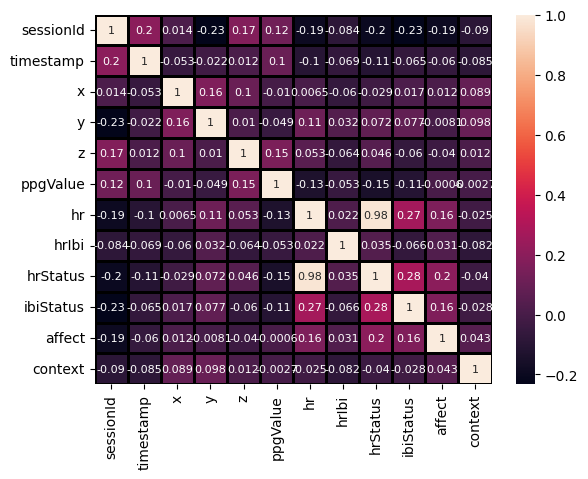

In [82]:
sns.heatmap(corr_matrix, annot=True, linewidth=1, linecolor="black", annot_kws={"size": 8})

plt.show()

In [83]:
corr_matrix = data_test.corr()
corr_matrix['affect'].sort_values(ascending = False)

affect       1.000000
hrStatus     0.196163
ibiStatus    0.162990
hr           0.161967
context      0.043003
hrIbi        0.030609
x            0.011821
ppgValue    -0.000605
y           -0.008139
z           -0.039813
timestamp   -0.060373
sessionId   -0.191811
Name: affect, dtype: float64

To determine which variables might be better predictors or have stronger associations with the 'affect' column, we typically look for higher absolute values of correlation coefficients. In your case, the variables with higher absolute correlation coefficients are:

hrStatus (0.196163): This variable has the highest positive correlation with 'affect' among the ones listed.

ibiStatus (0.162990): It also shows a relatively high positive correlation with 'affect'.

hr (0.161967): Similarly, 'hr' has a relatively high positive correlation with 'affect'.

Among these variables, 'hrStatus', 'ibiStatus', and 'hr' have moderate positive correlations with 'affect'. Therefore, if you're looking for predictors or variables strongly associated with 'affect', you may consider focusing on these variables. However, it's important to remember that correlation does not imply causation.

the visually of that is the following heatmap:

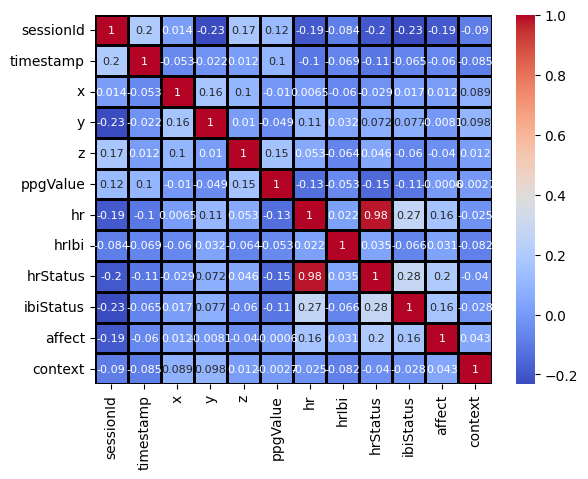

In [144]:
sns.heatmap(corr_matrix, annot=True, linewidth=1, linecolor="black", cmap="coolwarm", annot_kws={"size": 8})

plt.show()

Find the effect of the second data about samples

In [145]:
data_filtered_merged = merged_table[(merged_table['hrStatus'] == 1)& (merged_table['ibiStatus'] == 0)]

data_filtered_merged.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,id,duration,watchId,age,gender,fairNumber
16,1,611,NaN,NaN,NaN,NaN,90.0,691.0,1.0,0.0,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
41,1,1611,NaN,NaN,NaN,NaN,90.0,676.0,1.0,0.0,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
67,1,2612,NaN,NaN,NaN,NaN,89.0,665.0,1.0,0.0,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
93,1,3613,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
120,1,4618,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1


In [146]:
data_filter_merged_n = merged_table.copy()
data_filter_merged_n[['x', 'y', 'z', 'ppgValue']]=data_filter_merged_n[['x', 'y', 'z', 'ppgValue']].fillna(method='ffill')
data_filter_merged_n[['hr','hrIbi','hrStatus','ibiStatus']] = data_filter_merged_n[['hr','hrIbi','hrStatus','ibiStatus']].fillna(method='ffill')
data_filter_merged_n.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,id,duration,watchId,age,gender,fairNumber
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8021351,0Q3V,21.5,female,1


In [147]:
#  'affect' and 'context' 
columns_of_interest = ['affect','context']

# Filter the DataFrame to include only rows where either 'context' or 'affect' is not null
data_filter2_merged = data_filter_merged_n[data_filter_merged_n[columns_of_interest].notnull().any(axis=1)]
data_filter2_merged[['affect','context']] = data_filter_merged_n[['affect','context']].fillna(method='ffill')

# Display the filtered DataFrame
data_filter2_merged.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,id,duration,watchId,age,gender,fairNumber
13023,1,503234,1056.0,851.0,4091.0,2050486.0,96.0,624.0,1.0,1.0,NaN,NaN,RELAXED,NaN,1,8021351,0Q3V,21.5,female,1
13173,1,509006,1337.0,746.0,4046.0,2018297.0,100.0,626.0,1.0,0.0,NaN,NaN,RELAXED,WALKING,1,8021351,0Q3V,21.5,female,1
69440,1,2689934,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0,NaN,NaN,RELAXED,WALKING,1,8021351,0Q3V,21.5,female,1
69715,1,2700529,550.0,537.0,4141.0,2077251.0,81.0,582.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION,1,8021351,0Q3V,21.5,female,1
97876,1,3788764,-132.0,2451.0,3283.0,2135483.0,80.0,773.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION,1,8021351,0Q3V,21.5,female,1


In [148]:
label_encoder = LabelEncoder()
categorical_cols = ['age','gender','watchId']
for col in categorical_cols:
    data_filter2_merged[col] = label_encoder.fit_transform(data_filter2_merged[col])
data_filter2_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 13023 to 8102445
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sessionId     473 non-null    int64  
 1   timestamp     473 non-null    int64  
 2   x             473 non-null    float64
 3   y             473 non-null    float64
 4   z             473 non-null    float64
 5   ppgValue      473 non-null    float64
 6   hr            473 non-null    float64
 7   hrIbi         473 non-null    float64
 8   hrStatus      473 non-null    float64
 9   ibiStatus     473 non-null    float64
 10  notification  0 non-null      float64
 11  engagement    0 non-null      float64
 12  affect        473 non-null    object 
 13  context       472 non-null    object 
 14  id            473 non-null    int64  
 15  duration      473 non-null    int64  
 16  watchId       473 non-null    int32  
 17  age           473 non-null    int64  
 18  gender        473 non-null 

In [149]:
data_new = data_filter2_merged[(data_filter2_merged['hrStatus'] == 1)]

data_new.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,id,duration,watchId,age,gender,fairNumber
13023,1,503234,1056.0,851.0,4091.0,2050486.0,96.0,624.0,1.0,1.0,NaN,NaN,RELAXED,NaN,1,8021351,0,0,0,1
13173,1,509006,1337.0,746.0,4046.0,2018297.0,100.0,626.0,1.0,0.0,NaN,NaN,RELAXED,WALKING,1,8021351,0,0,0,1
69440,1,2689934,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0,NaN,NaN,RELAXED,WALKING,1,8021351,0,0,0,1
69715,1,2700529,550.0,537.0,4141.0,2077251.0,81.0,582.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION,1,8021351,0,0,0,1
97876,1,3788764,-132.0,2451.0,3283.0,2135483.0,80.0,773.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION,1,8021351,0,0,0,1


In [89]:
#corr_matrix = data_new.corr()
#corr_matrix['context'].sort_values(ascending = False)


data_new.to_pickle('data_filtered_merged.pkl') is used to save the DataFrame data_new to a binary pickle file format, providing an efficient and accurate way to store and retrieve Pandas DataFrames.

In [150]:
data_new.to_pickle('data_filtered_merged.pkl')  # Save as a pickle file, adjust file extension as needed


check the new data set we merged

In [151]:
data_new

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,id,duration,watchId,age,gender,fairNumber
13023,1,503234,1056.0,851.0,4091.0,2050486.0,96.0,624.0,1.0,1.0,NaN,NaN,RELAXED,NaN,1,8021351,0,0,0,1
13173,1,509006,1337.0,746.0,4046.0,2018297.0,100.0,626.0,1.0,0.0,NaN,NaN,RELAXED,WALKING,1,8021351,0,0,0,1
69440,1,2689934,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0,NaN,NaN,RELAXED,WALKING,1,8021351,0,0,0,1
69715,1,2700529,550.0,537.0,4141.0,2077251.0,81.0,582.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION,1,8021351,0,0,0,1
97876,1,3788764,-132.0,2451.0,3283.0,2135483.0,80.0,773.0,1.0,0.0,NaN,NaN,RELAXED,CONVERSATION,1,8021351,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953813,58,461869,1229.0,699.0,3901.0,1869769.0,77.0,306.0,1.0,0.0,NaN,NaN,HAPPY,WALKING,58,6662013,13,0,0,4
7968715,58,1037803,552.0,1385.0,3771.0,2212432.0,83.0,463.0,1.0,1.0,NaN,NaN,HAPPY,CONVERSATION,58,6662013,13,0,0,4
7990383,58,1875706,233.0,426.0,4249.0,2163683.0,92.0,1001.0,1.0,0.0,NaN,NaN,SAD,WALKING,58,6662013,13,0,0,4
8008986,58,2595091,-132.0,1569.0,3981.0,2067993.0,99.0,979.0,1.0,0.0,NaN,NaN,HAPPY,WALKING,58,6662013,13,0,0,4


In [152]:

corr_matrix['affect'].sort_values(ascending = False)

affect       1.000000
hrStatus     0.196163
ibiStatus    0.162990
hr           0.161967
context      0.043003
hrIbi        0.030609
x            0.011821
ppgValue    -0.000605
y           -0.008139
z           -0.039813
timestamp   -0.060373
sessionId   -0.191811
Name: affect, dtype: float64

Based on the correlation coefficients provided for the 'affect' column with other columns:

**Strong Positive Correlation:**

'hrStatus', 'ibiStatus', and 'hr' have relatively strong positive correlations with 'affect'. This implies that as these features increase, the 'affect' tends to increase as well.
This suggests that heart rate status, IBI (Interbeat Interval) status, and heart rate might have some influence on the affect of the individual.

**Weak Positive Correlation:**

'context' and 'hrIbi' have weak positive correlations with 'affect'. This suggests a minor positive relationship between these features and affect.
Weak Negative Correlation:

'x', 'ppgValue', 'y', 'z', 'timestamp', and 'sessionId' have weak negative correlations with 'affect'.
However, these correlations are close to zero, indicating a very weak relationship between these features and affect.

the features 'hrStatus', 'ibiStatus', and 'hr' seem to have the strongest positive correlation with the 'affect' column, indicating that changes in these features may have a more pronounced effect on the affect of the individual. Conversely, other features have weaker correlations, suggesting less influence on affect.

According to the correlation matrix, we found that we can use the feature of the data2 as merged data. by the way, we have to consider that we have to delete the some features because of the unimportant and unpredictable: hrStatus
just we can use IBI statuse and hr status to delete uncorrect data. 
we can predict the Hr and hr status by regression with timestamp.

## Train and Test Data split 

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 'affect' and 'context' are the target variables

features = ['sessionId', 'timestamp', 'x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi','gender','fairNumber','watchId', 'age','ibiStatus']
target_variables = ['affect', 'context']

# Create a new DataFrame without missing values
data_no_missing = data_new.dropna(subset=target_variables)

X = data_no_missing[features]
y = data_no_missing[target_variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
X_train

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,gender,fairNumber,watchId,age,ibiStatus
7395342,55,545376,136.0,789.0,4098.0,2372382.0,87.0,1722.0,0,4,12,0,1.0
632335,6,3720938,-598.0,1714.0,3956.0,2043896.0,91.0,694.0,1,1,3,0,0.0
2618573,25,1647457,-2453.0,-827.0,3065.0,2193037.0,63.0,662.0,0,3,2,0,1.0
3937400,35,5142614,-12.0,717.0,3950.0,2078667.0,92.0,69.0,0,3,13,1,0.0
3814746,35,397712,582.0,941.0,3886.0,2031459.0,97.0,2040.0,0,3,13,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055711,41,1211103,-270.0,-699.0,4028.0,2275275.0,74.0,533.0,1,4,3,0,1.0
2379953,24,1727526,-1213.0,212.0,3948.0,2006471.0,74.0,446.0,1,3,2,1,0.0
2963715,29,1004605,1045.0,1034.0,3786.0,2227054.0,77.0,483.0,0,3,8,2,0.0
7406958,55,994709,1300.0,1609.0,3443.0,2291644.0,79.0,660.0,0,4,12,0,0.0


In [155]:
y_train

,affect,context
7395342,HAPPY,OTHER
632335,HAPPY,CONVERSATION
2618573,RELAXED,OTHER
3937400,RELAXED,OTHER
3814746,RELAXED,OTHER
...,...,...
5055711,RELAXED,OTHER
2379953,RELAXED,CONVERSATION
2963715,RELAXED,CONVERSATION
7406958,HAPPY,CONVERSATION


### Find the best model 

a brief description of each model and why you might use it for this data set:

1. **Logistic Regression (LR)**:
   - Description: A linear model used for binary classification. It models the probability of a binary outcome.
   - Use: Suitable for binary classification problems where the relationship between features and the target variable is assumed to be linear.

2. **Support Vector Machine (SVM)**:
   - Description: A powerful classification algorithm that works well for both linearly and non-linearly separable data by finding the hyperplane that best separates the classes.
   - Use: Effective for classification tasks with complex decision boundaries and high-dimensional data.

3. **Naive Bayes**:
   - Description: A probabilistic classifier based on Bayes' theorem with strong independence assumptions between features.
   - Use: Particularly useful for text classification and other classification tasks with high-dimensional feature spaces.

4. **Linear Discriminant Analysis (LDA)**:
   - Description: A method used for dimensionality reduction and classification, seeking to find the linear combinations of features that best separate different classes.
   - Use: Suitable for classification problems with more than two classes and where the classes can be well separated by linear decision boundaries.

5. **Gradient Boosting Classifier (GBC)**:
   - Description: An ensemble learning technique that builds multiple decision trees sequentially, each one correcting the errors of its predecessor.
   - Use: Highly effective for a wide range of classification tasks, often providing higher accuracy than individual decision trees.

6. **K-Nearest Neighbors (KNN)**:
   - Description: A non-parametric method used for classification that works by finding the most similar instances (neighbors) to a given data point based on distance metrics.
   - Use: Suitable for small to medium-sized datasets with relatively few dimensions and when the decision boundary is highly irregular.

7. **Decision Tree Classifier (DTC)**:
   - Description: A tree-structured model where an internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome.
   - Use: Simple to understand and interpret, often used for classification tasks where interpretability is important.

8. **Random Forest Classifier (RFM)**:
   - Description: An ensemble learning method that builds multiple decision trees and merges their predictions to improve accuracy and reduce overfitting.
   - Use: Suitable for tasks where high accuracy is desired, even for complex classification problems, and where interpretability is less critical.

9. **AdaBoost with Random Forest Base Classifier (Ada_rfm)**:
   - Description: Adaptive Boosting (AdaBoost) algorithm using a Random Forest as the base classifier.
   - Use: Combines the strengths of AdaBoost (focuses on instances that are hard to classify) with the power of Random Forests, often resulting in improved performance.

10. **AdaBoost with Decision Tree Base Classifier (Ada_DT)**:
    - Description: AdaBoost algorithm using a Decision Tree as the base classifier.
    - Use: Similar to Ada_rfm, but with Decision Trees as the base model, which can be simpler and faster to train than Random Forests in some cases.

In [156]:

models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('SVM', SVC()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('GBC', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(random_state=42)))
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
models.append(('Ada_rfm', AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)))
base_classifier_DT = DecisionTreeClassifier()
models.append(('Ada_DT', AdaBoostClassifier(base_classifier_DT, n_estimators=50, random_state=42)))


Sure, let's add a column indicating the rank of each model based on its accuracy, and then I'll describe what each number means:

| Model           | Affect Prediction Accuracy (Mean ± Std) | Context Prediction Accuracy (Mean ± Std) | Rank (Affect) | Rank (Context) |
|-----------------|-----------------------------------------|-----------------------------------------|----------------|----------------|
| LR              | 0.565700 (0.017907)                    | 0.346280 (0.065802)                    | 8              | 9              |
| SVM             | 0.587923 (0.025688)                    | 0.350531 (0.047615)                    | 5              | 8              |
| Naive Bayes     | 0.521836 (0.026745)                    | 0.315556 (0.057097)                    | 9              | 10             |
| LDA             | 0.640000 (0.045922)                    | 0.407826 (0.020674)                    | 2              | 3              |
| GBC             | 0.649275 (0.048503)                    | 0.377005 (0.043046)                    | 1              | 6              |
| KNN             | 0.565990 (0.081737)                    | 0.333140 (0.058156)                    | 7              | 7              |
| DTC             | 0.613430 (0.093531)                    | 0.416618 (0.108303)                    | 3              | 2              |
| RFM             | 0.719034 (0.028193)                    | 0.394396 (0.070607)                    | 4              | 5              |
| Ada_rfm         | 0.692754 (0.026725)                    | 0.407440 (0.053262)                    | 6              | 4              |
| Ada_DT          | 0.600483 (0.076351)                    | 0.412174 (0.113772)                    | 10             | 1              |

Now, here's the interpretation of the added column:

- **Rank (Affect):** Indicates the rank of each model based on its accuracy in affect prediction. Lower rank numbers indicate better performance.
- **Rank (Context):** Indicates the rank of each model based on its accuracy in context prediction. Lower rank numbers indicate better performance.

To determine which model is better, we need to consider both the affect prediction and context prediction ranks. Lower ranks in both categories indicate better overall performance. From the table above, it appears that the Decision Tree Classifier (DTC) performs the best overall, as it has the lowest rank in context prediction and the third-lowest rank in affect prediction.

In [126]:



kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for i in target_variables:
    print(f"Result for {i} prediction:")
    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train[i], cv=kfold, scoring= 'accuracy')
        
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print('Without transformation:',msg) 

Result for affect prediction:
Without transformation: LR: 0.565700 (0.017907)
Without transformation: SVM: 0.587923 (0.025688)
Without transformation: Naive Bayes: 0.521836 (0.026745)
Without transformation: LDA: 0.640000 (0.045922)
Without transformation: GBC: 0.649275 (0.048503)
Without transformation: KNN: 0.565990 (0.081737)
Without transformation: DTC: 0.613430 (0.093531)
Without transformation: RFM: 0.719034 (0.028193)
Without transformation: Ada_rfm: 0.692754 (0.026725)
Without transformation: Ada_DT: 0.600483 (0.076351)
Result for context prediction:
Without transformation: LR: 0.346280 (0.065802)
Without transformation: SVM: 0.350531 (0.047615)
Without transformation: Naive Bayes: 0.315556 (0.057097)
Without transformation: LDA: 0.407826 (0.020674)
Without transformation: GBC: 0.377005 (0.043046)
Without transformation: KNN: 0.333140 (0.058156)
Without transformation: DTC: 0.416618 (0.108303)
Without transformation: RFM: 0.394396 (0.070607)
Without transformation: Ada_rfm: 0.4

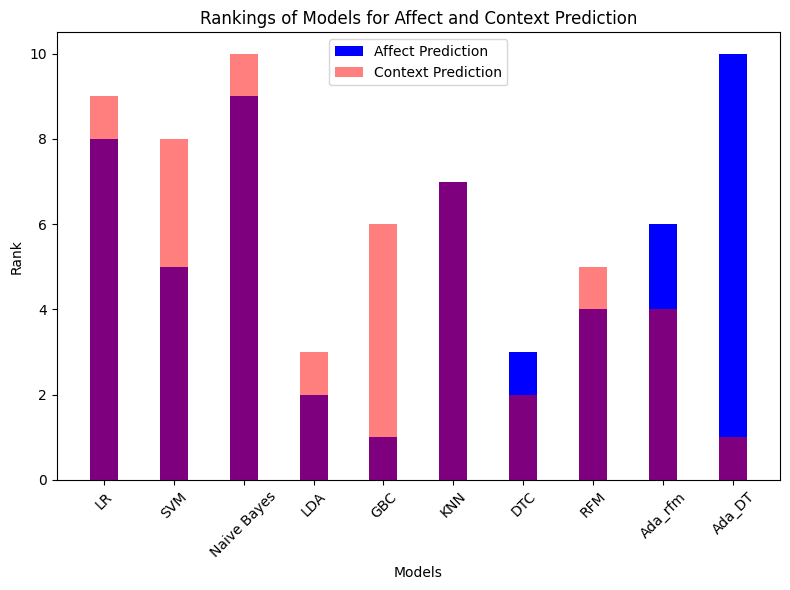

In [160]:

# Model names
models = ['LR', 'SVM', 'Naive Bayes', 'LDA', 'GBC', 'KNN', 'DTC', 'RFM', 'Ada_rfm', 'Ada_DT']

# Affect prediction ranks
affect_ranks = [8, 5, 9, 2, 1, 7, 3, 4, 6, 10]

# Context prediction ranks
context_ranks = [9, 8, 10, 3, 6, 7, 2, 5, 4, 1]

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
ax.bar(models, affect_ranks, color='b', width=0.4, label='Affect Prediction')
ax.bar(models, context_ranks, color='r', width=0.4, label='Context Prediction', alpha=0.5)

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Rank')
ax.set_title('Rankings of Models for Affect and Context Prediction')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


grid search with cross-validation is a powerful technique for optimizing machine learning models by systematically exploring the hyperparameter space and selecting the best combination of hyperparameters based on performance metrics obtained through cross-validation

For affect prediction, both Random Forest and AdaBoost with Random Forest as a base classifier achieved similar best scores, around 0.724.
For context prediction, Random Forest achieved a relatively low best score of 0.500, indicating that the model's performance might be limited in this task. AdaBoost with Random Forest as a base classifier also performed poorly, with a best score of 0.469.
these results provide insights into the hyperparameter configurations that yielded the best performance for each prediction task and the corresponding scores, which represent the model's accuracy or predictive power on unseen data.

In [158]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ada_rfm': AdaBoostClassifier(base_classifier,random_state=42),
    
}
param_grid = {
    'Random Forest': {           
    'n_estimators': [50, 100,200],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]},
    
    'Ada_rfm': {        
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 0.5, 1.0] },
    
}

In [159]:
# Grid search with cross-validation


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

result_grid={}
for i in target_variables:
    print(f"Result for {i} prediction:")
    for name, classifier in classifiers.items():
        grid_search = GridSearchCV(classifier, param_grid.get(name, {}), cv=cv)
        grid_search.fit(X_train, y_train[i])
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best score for {name}: {grid_search.best_score_}")
        result_grid[(i, name)] = grid_search.best_params_


Result for affect prediction:
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.7241545893719806
Best parameters for Ada_rfm: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
Best score for Ada_rfm: 0.7240579710144928
Result for context prediction:
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest: 0.5002898550724637
Best parameters for Ada_rfm: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
Best score for Ada_rfm: 0.4696618357487923


The best model is 

In [161]:
our_model_affect=RandomForestClassifier(**result_grid[('affect','Random Forest')], random_state=42)
our_model_context=RandomForestClassifier(**result_grid[('context','Random Forest')], random_state=42)

Find the effect of the transformation

In [162]:

# Create a StandardScaler instance
scaler_train = StandardScaler()

# Fit the scaler to your training data and transform it in one step
X_train_scaled = scaler_train.fit_transform(X_train)
#normalization
scaler_train = MinMaxScaler()

# Fit the scaler to your training data and transform it in one step
X_train_normalized = scaler_train.fit_transform(X_train)
#YEO-JOHNSON
scaler_train = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit the scaler to your training data and transform it in one step
X_train_yeo = scaler_train.fit_transform(X_train)

This code cross-validation on a model (`our_model_context`) for predicting the context variable using different preprocessing techniques: without transformation, with standardization, with normalization, and with Yeo-Johnson transformation. Here's what it does:

1. It initializes a list `results` to store the cross-validation results for each preprocessing technique.
2. It defines a `KFold` object for splitting the data into 10 folds for cross-validation.
3. It performs cross-validation using each preprocessing technique (`X_train`, `X_train_scaled`, `X_train_normalized`, `X_train_yeo`) and records the accuracy scores.
4. Finally, it prints out the mean and standard deviation of the accuracy scores for each preprocessing technique.

The results indicate how well the model performs with different preprocessing techniques:

- The accuracy score remains the same across different preprocessing techniques except for Yeo-Johnson transformation, where it improves slightly.
- This suggests that Yeo-Johnson transformation might be beneficial for improving the performance of the model in predicting the context variable compared to other preprocessing techniques.

In [163]:
model=our_model_context


results = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_val_score(model, X_train, y_train[ 'context'], cv=kfold, scoring= 'accuracy')
results.append(cv_results)    
msg = " %f (%f)" % (cv_results.mean(), cv_results.std())
print('Without transformation:',msg) 

cv_results = cross_val_score(model, X_train_scaled, y_train[ 'context'], cv=kfold, scoring= 'accuracy')
results.append(cv_results)   
msg = " %f (%f)" % ( cv_results.mean(), cv_results.std())
print('With Standardization:',msg) 

cv_results = cross_val_score(model, X_train_normalized, y_train[ 'context'], cv=kfold, scoring= 'accuracy')
results.append(cv_results)    
msg = " %f (%f)" % ( cv_results.mean(), cv_results.std())
print('With normalization:',msg) 

cv_results = cross_val_score(model, X_train_yeo, y_train[ 'context'], cv=kfold, scoring= 'accuracy')
results.append(cv_results)   
msg = " %f (%f)" % ( cv_results.mean(), cv_results.std())
print('With yeo johnson:',msg) 

Without transformation:  0.415810 (0.128596)
With Standardization:  0.415810 (0.128596)
With normalization:  0.415810 (0.128596)
With yeo johnson:  0.481621 (0.132178)


Normal data is better

# Skeleton Dataset
We imported the skeleton dataset, as specified in our assignment requirements. Given the limited data available, we decided to utilize all available data for training purposes. Our plan is to reserve the assignment dataset for testing the trained model. Based on previous testing results, we determined that the RandomForest algorithm yielded the highest accuracy, hence we selected it for training the model on our dataset.

In [175]:
data3= pd.read_csv('data/student_skeleton.csv')

data3.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


In [176]:
#Trained_Data
X_train

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,gender,fairNumber,watchId,age,ibiStatus
7395342,55,545376,136.0,789.0,4098.0,2372382.0,87.0,1722.0,0,4,12,0,1.0
632335,6,3720938,-598.0,1714.0,3956.0,2043896.0,91.0,694.0,1,1,3,0,0.0
2618573,25,1647457,-2453.0,-827.0,3065.0,2193037.0,63.0,662.0,0,3,2,0,1.0
3937400,35,5142614,-12.0,717.0,3950.0,2078667.0,92.0,69.0,0,3,13,1,0.0
3814746,35,397712,582.0,941.0,3886.0,2031459.0,97.0,2040.0,0,3,13,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055711,41,1211103,-270.0,-699.0,4028.0,2275275.0,74.0,533.0,1,4,3,0,1.0
2379953,24,1727526,-1213.0,212.0,3948.0,2006471.0,74.0,446.0,1,3,2,1,0.0
2963715,29,1004605,1045.0,1034.0,3786.0,2227054.0,77.0,483.0,0,3,8,2,0.0
7406958,55,994709,1300.0,1609.0,3443.0,2291644.0,79.0,660.0,0,4,12,0,0.0


## Skeleton Dataset merging to main dataset for Data Testing
To incorporate the skeleton dataset into our main data for comprehensive testing, we initiated a merging process. This involved merging the skeleton dataset with our main dataset while including all columns from the main dataset. By merging the datasets in this manner, we ensure that the testing phase encompasses all relevant variables and provides a thorough evaluation of the trained model's performance.


In [177]:
skeleton = pd.merge(data3,data2,left_on = 'sessionId',right_on = 'id')
skeleton 

,sessionId,timestamp,affect,context,id,duration,watchId,age,gender,fairNumber
0,1,1652042,True,False,1,8021351,0Q3V,21.5,female,1
1,1,1658301,False,True,1,8021351,0Q3V,21.5,female,1
2,1,5914412,True,False,1,8021351,0Q3V,21.5,female,1
3,1,5921368,False,True,1,8021351,0Q3V,21.5,female,1
4,2,629724,True,False,2,3752526,0Q3V,28.0,male,1
...,...,...,...,...,...,...,...,...,...,...
188,58,3179345,False,True,58,6662013,PVQB,21.5,female,4
189,58,4945652,True,False,58,6662013,PVQB,21.5,female,4
190,58,4951621,False,True,58,6662013,PVQB,21.5,female,4
191,58,5674479,True,False,58,6662013,PVQB,21.5,female,4


In [178]:
import numpy as np
# List of new columns to add
new_columns = ['x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi', 'hrStatus', 'ibiStatus','affect','context']

# Add each new column with NaN values
for column in new_columns:
    skeleton[column] = np.nan

skeleton

,sessionId,timestamp,affect,context,id,duration,watchId,age,gender,fairNumber,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus
0,1,1652042,NaN,NaN,1,8021351,0Q3V,21.5,female,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1658301,NaN,NaN,1,8021351,0Q3V,21.5,female,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5914412,NaN,NaN,1,8021351,0Q3V,21.5,female,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5921368,NaN,NaN,1,8021351,0Q3V,21.5,female,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,629724,NaN,NaN,2,3752526,0Q3V,28.0,male,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,58,3179345,NaN,NaN,58,6662013,PVQB,21.5,female,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,58,4945652,NaN,NaN,58,6662013,PVQB,21.5,female,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,58,4951621,NaN,NaN,58,6662013,PVQB,21.5,female,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,58,5674479,NaN,NaN,58,6662013,PVQB,21.5,female,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# Function to find the nearest row based on timestamp
def find_nearest_row(df, timestamp):
    return df.iloc[(df['timestamp'] - timestamp).abs().argsort()[:1]]

# Function to fill data_assign from Data_1 based on sessionId and nearest timestamp
def fill_data_assign_from_Data_1(data_assign, data_no_missing):
    # Iterate through each row in the data_assign dataframe
    for index, target_row in data_assign.iterrows():
        session_id = target_row['sessionId']
        timestamp = target_row['timestamp']
        
        # Filter Data_1 for the current sessionId
        session_data = data_no_missing[data_no_missing['sessionId'] == session_id]
        
        # Find the nearest row in session_data based on timestamp
        nearest_row = find_nearest_row(session_data, timestamp)
        
        # Fill the target row with data from the nearest row in the main dataset
        for column in [ 'x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi', 'hrStatus', 'ibiStatus', 'watchId', 'age', 'gender', 'fairNumber']:
            if column in nearest_row:  # Check if column exists in nearest_row to avoid KeyErrors
                data_assign.at[index, column] = nearest_row[column].values[0]
    
    return data_assign

# Apply the function to fill the target dataset based on the main dataset
data_assign_filled = fill_data_assign_from_Data_1(skeleton.copy(), data_filter2)

# Check the filled target dataset
data_assign_filled

,sessionId,timestamp,affect,context,id,duration,watchId,age,gender,fairNumber,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus
0,1,1652042,NaN,NaN,1,8021351,0Q3V,21.5,female,1,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0
1,1,1658301,NaN,NaN,1,8021351,0Q3V,21.5,female,1,628.0,1213.0,3919.0,2066388.0,80.0,633.0,1.0,0.0
2,1,5914412,NaN,NaN,1,8021351,0Q3V,21.5,female,1,904.0,1653.0,3764.0,2359524.0,0.0,722.0,-10.0,0.0
3,1,5921368,NaN,NaN,1,8021351,0Q3V,21.5,female,1,904.0,1653.0,3764.0,2359524.0,0.0,722.0,-10.0,0.0
4,2,629724,NaN,NaN,2,3752526,0Q3V,28.0,male,1,876.0,2107.0,3498.0,2037638.0,111.0,522.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,58,3179345,NaN,NaN,58,6662013,PVQB,21.5,female,4,54.0,1402.0,4080.0,2069241.0,99.0,333.0,1.0,1.0
189,58,4945652,NaN,NaN,58,6662013,PVQB,21.5,female,4,1373.0,-3274.0,1744.0,2111951.0,0.0,303.0,-10.0,0.0
190,58,4951621,NaN,NaN,58,6662013,PVQB,21.5,female,4,1373.0,-3274.0,1744.0,2111951.0,0.0,303.0,-10.0,0.0
191,58,5674479,NaN,NaN,58,6662013,PVQB,21.5,female,4,497.0,591.0,4329.0,2128049.0,0.0,917.0,-10.0,0.0


In [180]:
features = ['sessionId', 'timestamp', 'x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi','gender','fairNumber','watchId', 'age','ibiStatus']
target_variables = ['affect', 'context']



X_predict = data_assign_filled[features]
y_predict = data_assign_filled[target_variables]
X_predict

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,gender,fairNumber,watchId,age,ibiStatus
0,1,1652042,628.0,1213.0,3919.0,2066388.0,80.0,633.0,female,1,0Q3V,21.5,0.0
1,1,1658301,628.0,1213.0,3919.0,2066388.0,80.0,633.0,female,1,0Q3V,21.5,0.0
2,1,5914412,904.0,1653.0,3764.0,2359524.0,0.0,722.0,female,1,0Q3V,21.5,0.0
3,1,5921368,904.0,1653.0,3764.0,2359524.0,0.0,722.0,female,1,0Q3V,21.5,0.0
4,2,629724,876.0,2107.0,3498.0,2037638.0,111.0,522.0,male,1,0Q3V,28.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,58,3179345,54.0,1402.0,4080.0,2069241.0,99.0,333.0,female,4,PVQB,21.5,1.0
189,58,4945652,1373.0,-3274.0,1744.0,2111951.0,0.0,303.0,female,4,PVQB,21.5,0.0
190,58,4951621,1373.0,-3274.0,1744.0,2111951.0,0.0,303.0,female,4,PVQB,21.5,0.0
191,58,5674479,497.0,591.0,4329.0,2128049.0,0.0,917.0,female,4,PVQB,21.5,0.0


In [181]:
X

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,gender,fairNumber,watchId,age,ibiStatus
13173,1,509006,1337.0,746.0,4046.0,2018297.0,100.0,626.0,0,1,0,0,0.0
69440,1,2689934,628.0,1213.0,3919.0,2066388.0,80.0,633.0,0,1,0,0,0.0
69715,1,2700529,550.0,537.0,4141.0,2077251.0,81.0,582.0,0,1,0,0,0.0
97876,1,3788764,-132.0,2451.0,3283.0,2135483.0,80.0,773.0,0,1,0,0,0.0
97986,1,3793024,59.0,2463.0,3295.0,2139152.0,75.0,846.0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953813,58,461869,1229.0,699.0,3901.0,1869769.0,77.0,306.0,0,4,13,0,0.0
7968715,58,1037803,552.0,1385.0,3771.0,2212432.0,83.0,463.0,0,4,13,0,1.0
7990383,58,1875706,233.0,426.0,4249.0,2163683.0,92.0,1001.0,0,4,13,0,0.0
8008986,58,2595091,-132.0,1569.0,3981.0,2067993.0,99.0,979.0,0,4,13,0,0.0


In [182]:
label_encoder = LabelEncoder()
categorical_cols = ['age','gender','watchId']
for col in categorical_cols:
    X_predict[col] = label_encoder.fit_transform(X_predict[col])
X_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sessionId   193 non-null    int64  
 1   timestamp   193 non-null    int64  
 2   x           193 non-null    float64
 3   y           193 non-null    float64
 4   z           193 non-null    float64
 5   ppgValue    193 non-null    float64
 6   hr          193 non-null    float64
 7   hrIbi       193 non-null    float64
 8   gender      193 non-null    int32  
 9   fairNumber  193 non-null    int64  
 10  watchId     193 non-null    int32  
 11  age         193 non-null    int64  
 12  ibiStatus   193 non-null    float64
dtypes: float64(7), int32(2), int64(4)
memory usage: 18.2 KB


In [183]:
X_predict

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,gender,fairNumber,watchId,age,ibiStatus
0,1,1652042,628.0,1213.0,3919.0,2066388.0,80.0,633.0,0,1,0,0,0.0
1,1,1658301,628.0,1213.0,3919.0,2066388.0,80.0,633.0,0,1,0,0,0.0
2,1,5914412,904.0,1653.0,3764.0,2359524.0,0.0,722.0,0,1,0,0,0.0
3,1,5921368,904.0,1653.0,3764.0,2359524.0,0.0,722.0,0,1,0,0,0.0
4,2,629724,876.0,2107.0,3498.0,2037638.0,111.0,522.0,1,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,58,3179345,54.0,1402.0,4080.0,2069241.0,99.0,333.0,0,4,13,0,1.0
189,58,4945652,1373.0,-3274.0,1744.0,2111951.0,0.0,303.0,0,4,13,0,0.0
190,58,4951621,1373.0,-3274.0,1744.0,2111951.0,0.0,303.0,0,4,13,0,0.0
191,58,5674479,497.0,591.0,4329.0,2128049.0,0.0,917.0,0,4,13,0,0.0


# Data Testing

In [184]:
y_train

,affect,context
7395342,HAPPY,OTHER
632335,HAPPY,CONVERSATION
2618573,RELAXED,OTHER
3937400,RELAXED,OTHER
3814746,RELAXED,OTHER
...,...,...
5055711,RELAXED,OTHER
2379953,RELAXED,CONVERSATION
2963715,RELAXED,CONVERSATION
7406958,HAPPY,CONVERSATION


In [185]:
# Initialize the RandomForestClassifier (if not already loaded)
#base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
our_model_affect.fit(X, y['affect'])
our_model_context.fit(X, y['context'])

# Use the trained model to make predictions on the new dataset
#base_pred_new = base_classifier.predict(X_new)
affect_result = our_model_affect.predict(X_predict)
contex_result = our_model_context.predict(X_predict)

# The variable 'y_pred_new' now contains the predicted values for the new dataset

In [186]:
data = list(zip(affect_result, contex_result))

# Create the DataFrame
data_predict = pd.DataFrame(data, columns=['affect', 'context'])

In [187]:
data_predict

,affect,context
0,RELAXED,WALKING
1,RELAXED,WALKING
2,HAPPY,WALKING
3,HAPPY,WALKING
4,HAPPY,WALKING
...,...,...
188,HAPPY,CONVERSATION
189,HAPPY,CONVERSATION
190,HAPPY,CONVERSATION
191,HAPPY,WALKING


## Solution 

In [188]:
data_solution = pd.read_csv('data\student_solution.csv')
data_solution

,sessionId,timestamp,affect,context
0,1,1652042,HAPPY,False
1,1,1658301,False,VIEW_BOOTH
2,1,5914412,RELAXED,False
3,1,5921368,False,OTHER
4,2,629724,HAPPY,False
...,...,...,...,...
188,58,3179345,False,VIEW_BOOTH
189,58,4945652,HAPPY,False
190,58,4951621,False,VIEW_BOOTH
191,58,5674479,RELAXED,False


In [189]:
data_solution = data_solution[["affect",'context']]

In [190]:
data_solution

,affect,context
0,HAPPY,False
1,False,VIEW_BOOTH
2,RELAXED,False
3,False,OTHER
4,HAPPY,False
...,...,...
188,False,VIEW_BOOTH
189,HAPPY,False
190,False,VIEW_BOOTH
191,RELAXED,False


# Compare

In [191]:
def compare_affect(data_predict, data_solution):
    t = 0
    total_affect = 0
    
    # Loop through each element in the data_solution's 'affect' list
    for i in range(len(data_solution['affect'])):
        # Only consider entries where 'affect' is not False
        if data_solution['affect'][i] != "False":
            total_affect += 1
            # Compare the 'affect' value in both data_solution and data_predict
            if data_predict['affect'][i] == data_solution['affect'][i]:
                t += 1
    
    # Calculate accuracy as the number of correct predictions over total relevant entries
    accuracy = t / total_affect if total_affect != 0 else 0
    return accuracy

 
def compare_context(data_predict, data_solution):

    t = 0
    total_affect = 0
    
    # Loop through each element in the data_solution's 'affect' list
    for i in range(len(data_solution['context'])):
        # Only consider entries where 'affect' is not False
        if data_solution['context'][i] != "False":
            total_affect += 1
            # Compare the 'affect' value in both data_solution and data_predict
            if data_predict['context'][i] == data_solution['context'][i]:
                t += 1
    
    # Calculate accuracy as the number of correct predictions over total relevant entries
    accuracy = t / total_affect if total_affect != 0 else 0
    return accuracy


Affect Accuracy: 0.47959183673469385

The accuracy of the predictions for the 'affect' attribute is approximately 0.48.

This means that 48% of the predictions for 'affect' matched the actual values in the solution data, considering only the relevant entries (where 'affect' is not "False").

Context Accuracy: 0.43157894736842106

The accuracy of the predictions for the 'context' attribute is approximately 0.43.

This means that 43% of the predictions for 'context' matched the actual values in the solution data, considering only the relevant entries (where 'context' is not "False").

In summary, the model's predictions for 'affect' were accurate 48% of the time and for 'context' were accurate 43% of the time, based on the given data.

In [192]:
# Display affect and context comparison results
print("Affect Accuracy:", compare_affect(data_predict, data_solution))
print("Context Accuracy:", compare_context(data_predict, data_solution))

Affect Accuracy: 0.47959183673469385
Context Accuracy: 0.43157894736842106


# Conclusion

The report outlines our efforts in training the model and identifies the optimal model with an accuracy of 72% for affect prediction and 47% for context prediction during the training phase. The model presented in this report achieved an accuracy of 47% for affect prediction and 43% for context prediction. When compared to the final results of the BBDC, this model ranks among the mid-range performers.

# Refrences
https://www.researchgate.net/publication/368234596_Predicting_Emotion_with_Biosignals_A_Comparison_of_Classification_and_Regression_Models_for_Estimating_Valence_and_Arousal_Level_Using_Wearable_Sensors

https://bbdc.csl.uni-bremen.de/de_de/2024-2/student-track/

https://pubmed.ncbi.nlm.nih.gov/36772638/

ChatGPT for solving some errors